# K MEANS CLUSTERING
## In this notebook, i have used k-means for clustering crimes based on longitude and latitude and finding out the hotspots* of crime. I have used elbow plot to find the optimal value of k. Score for the elbow plot increases till k=4 then it forms an elbow at k=4. 
## Therefore, k=4 is the optimal value. Using this value, I have performed k-means clustering on dataset. 

## *hotspots : places where frequeny of occurance of crime is very high

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('da_proj_dataset.csv')

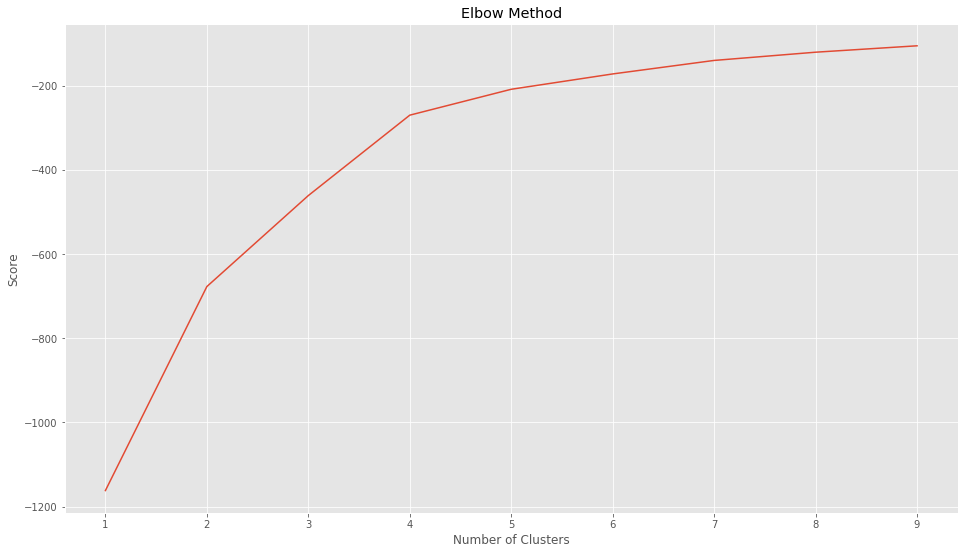

In [3]:
# K MEANS CLUSTERING

f1 = df['lat'].values
f2 = df['lon'].values
X = np.array(list(zip(f1, f2)))

# Finding the optimal value of k 
# Elbow method : Finding scores for each value of k.

number_clusters = range(1, 10)
kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

# From the Elbow graph, we find that elbow is formed at k=4. After k=4, the score is approximately constant.
# Therefore, this is the optimal value of k.

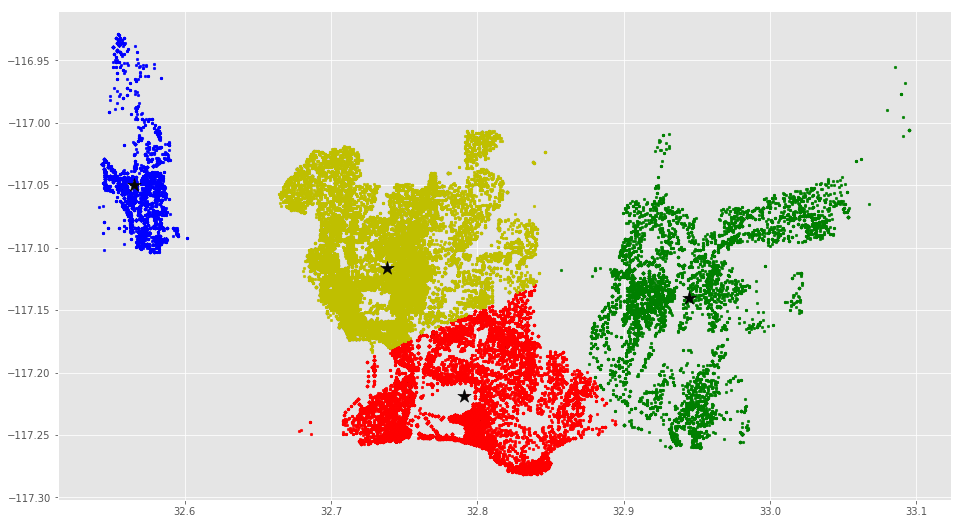

In [4]:
# Using k-means for k=4

# Number of clusters
kmeans = KMeans(n_clusters=4)
k=4
# Fitting the input data
kmeans = kmeans.fit(X)

# Getting the cluster labels
labels = kmeans.predict(X)

# Centroid values
C = kmeans.cluster_centers_

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
fig, ax = plt.subplots()
colors = ['r', 'g', 'b', 'y', 'c', 'm']
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if labels[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')



## In the plot above, black stars represent the mean of the clusters.